# K近邻

## 基于NumPy的实现

In [1]:
import numpy as np
from collections import Counter

### 算法流程

In [2]:
### 定义欧氏距离
def compute_distance(X, X_train):
    """
    输入:
    X: 测试样本实例矩阵
    X_train: 训练样本实例矩阵
    输出:
    dists: 欧氏距离
    """
    # 测试实例样本量
    num_test = X.shape[0]
    # 训练实例样本量
    num_train = X_train.shape[0]
    # 基于训练和测试维度的欧氏距离初始化
    dists = np.zeros((num_test, num_train))
    # 测试样本与训练样本的矩阵点乘
    M = np.dot(X, X_train.T)
    # 测试样本矩阵平方
    te = np.square(X).sum(axis=1)
    # 训练样本矩阵平方
    tr = np.square(X_train).sum(axis=1)
    # 计算欧氏距离
    dists = np.sqrt(tr + np.matrix(te).T - 2 * M)
    return dists

In [3]:
### 定义预测函数：包括k值选择和分类决策规则
def predict_labels(y_train, dists, k=1):
    """
    输入:
    y_train: 训练集标签
    dists: 测试集与训练集之间的欧式距离矩阵
    k: k值
    输出:
    y_pred: 测试集预测结果
    """
    # 测试样本量
    num_test = dists.shape[0]
    # 初始化测试集预测结果
    y_pred= np.zeros(num_test)
    # 遍历
    for i in range(num_test):
        # 初始化最近邻列表
        closest_y = []
        # 按欧氏距离矩阵排序后取索引，并用训练集标签按排序后的索引取值，最后展平列表
        labels = y_train[np.argsort(dists[i, :])].flatten()
        # 取最近的k个值
        closest_y = labels[:k]
        # 对最近的k个值进行计数统计
        c = Counter(closest_y)
        # 取计数最多的那个类别
        y_pred[i] = c.most_common(1)[0][0]
    return y_pred

### 数据测试

In [4]:
from sklearn import datasets
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [5]:
# 导入sklearn iris数据集
iris = datasets.load_iris()
# 打乱数据后的数据与标签
X, y = shuffle(iris.data, iris.target, random_state=13)
# 数据转换为float32格式
X = X.astype(np.float32)
# 划分训练集与测试集为7：3
offset = int(X.shape[0] * 0.7)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
# 将标签转换为列向量
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))
# 打印训练集和测试集大小
print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (105, 4)
X_test= (45, 4)
y_train= (105, 1)
y_test= (45, 1)


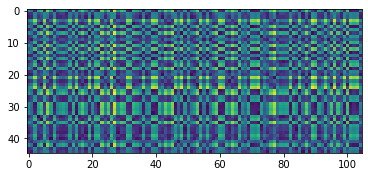

In [6]:
# 绘制欧氏距离图
dists = compute_distance(X_test, X_train)
plt.imshow(dists, interpolation='none')
plt.show();

In [7]:
# 测试集预测结果
y_test_pred = predict_labels(y_train, dists, k=1)
y_test_pred = y_test_pred.reshape((-1, 1))
# 找出预测正确的实例
num_correct = np.sum(y_test_pred == y_test)
# 计算分类准确率
accuracy = float(num_correct) / X_test.shape[0]
print('KNN Accuracy based on NumPy:', accuracy)

KNN Accuracy based on NumPy: 0.9777777777777777


In [9]:
# 用五折交叉验证寻找最优k值
num_folds = 5
# 候选k值
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
# 训练数据与标签划分
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
k_to_accuracies = {}
# 遍历所有候选k值
for k in k_choices:
    # 五折遍历
    for fold in range(num_folds):
        # 为传入的训练集单独划分出一个验证集作为测试集
        validation_X_test = X_train_folds[fold]
        validation_y_test = y_train_folds[fold]
        temp_X_train = np.concatenate(X_train_folds[:fold] + X_train_folds[fold + 1:])
        temp_y_train = np.concatenate(y_train_folds[:fold] + y_train_folds[fold + 1:])
        # 计算距离
        temp_dists = compute_distance(validation_X_test, temp_X_train)
        temp_y_test_pred = predict_labels(temp_y_train, temp_dists, k=k)
        temp_y_test_pred = temp_y_test_pred.reshape((-1, 1))
        # 查看分类准确率
        num_correct = np.sum(temp_y_test_pred == validation_y_test)
        num_test = validation_X_test.shape[0]
        accuracy = float(num_correct) / num_test
        k_to_accuracies[k] = k_to_accuracies.get(k, []) + [accuracy]
# 打印不同k值、不同折数下的分类准确率
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.904762
k = 1, accuracy = 1.000000
k = 1, accuracy = 0.952381
k = 1, accuracy = 0.857143
k = 1, accuracy = 0.952381
k = 3, accuracy = 0.857143
k = 3, accuracy = 1.000000
k = 3, accuracy = 0.952381
k = 3, accuracy = 0.857143
k = 3, accuracy = 0.952381
k = 5, accuracy = 0.857143
k = 5, accuracy = 1.000000
k = 5, accuracy = 0.952381
k = 5, accuracy = 0.904762
k = 5, accuracy = 0.952381
k = 8, accuracy = 0.904762
k = 8, accuracy = 1.000000
k = 8, accuracy = 0.952381
k = 8, accuracy = 0.904762
k = 8, accuracy = 0.952381
k = 10, accuracy = 0.952381
k = 10, accuracy = 1.000000
k = 10, accuracy = 0.952381
k = 10, accuracy = 0.904762
k = 10, accuracy = 0.952381
k = 12, accuracy = 0.952381
k = 12, accuracy = 1.000000
k = 12, accuracy = 0.952381
k = 12, accuracy = 0.857143
k = 12, accuracy = 0.952381
k = 15, accuracy = 0.952381
k = 15, accuracy = 1.000000
k = 15, accuracy = 0.952381
k = 15, accuracy = 0.857143
k = 15, accuracy = 0.952381
k = 20, accuracy = 0.952381
k = 20, accu

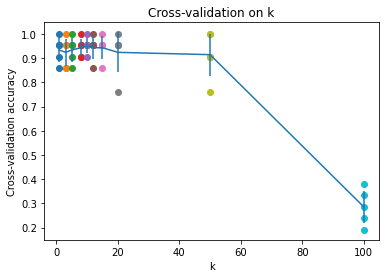

In [10]:
# 对不同k值下的分类准确率进行可视化展示
for k in k_choices:
    # 取出第k个k值得分类准确率
    accuracies = k_to_accuracies[k]
    # 绘制不同k值下分类准确率的散点图
    plt.scatter([k] * len(accuracies), accuracies)
# 计算分类准确率均值并排序
accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
# 计算分类准确率均值并排序
accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
# 绘制有置信区间的误差棒图
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
# 绘图标题及坐标轴标签
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show();

## 基于sklearn的实现

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# 创建k近邻实例
neigh = KNeighborsClassifier(n_neighbors=10)
# k近邻模型拟合
neigh.fit(X_train, y_train.ravel())
# k近邻模型预测
y_pred = neigh.predict(X_test)
# 预测结果数组重塑
y_pred = y_pred.reshape((-1, 1))
# 统计预测正确的个数
num_correct = np.sum(y_pred == y_test)
# 计算分类准确率
accuracy = float(num_correct) / X_test.shape[0]
print('KNN Accuracy based on sklearn:', accuracy)


KNN Accuracy based on sklearn: 0.9777777777777777
